##Inroduction

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has 
hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

bmi: body mass index

stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
# drop unnecessary column

df.drop('id',inplace=True,axis=1)

# Exploratory data analysis

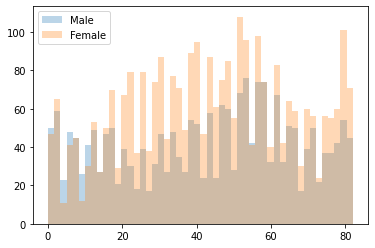

In [5]:
Male=df[df['gender']=='Male']
Female=df[df['gender']=='Female']

# As matplotlib cannot use hue function as seaborn, we need to extract male and female data manually
plt.hist(Male['age'],bins=50,label='Male',alpha=0.3)
plt.hist(Female['age'],bins=50,label='Female',alpha=0.3)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


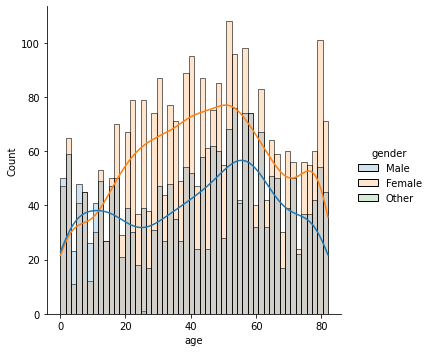

In [6]:
# plot the histogram in seaborn way, it provide more simple way
sns.displot(df,x='age',bins=50,hue='gender',kde=True,alpha=0.2)

Text(0.5, 0, 'Age')

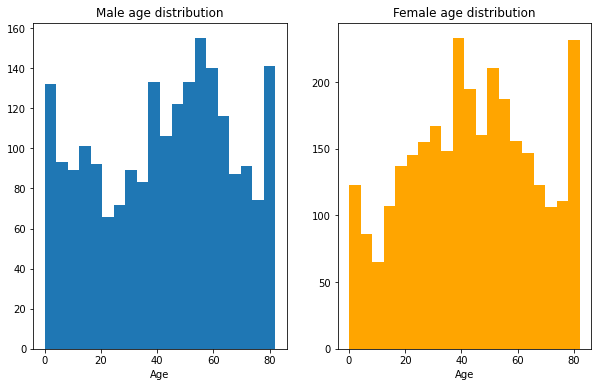

In [7]:
fig,ax=plt.subplots(1,2,figsize=(10,6))

ax[0].hist(Male['age'],bins=20,label='Male')
ax[0].set_title('Male age distribution')
ax[0].set_xlabel('Age')

ax[1].hist(Female['age'],bins=20,label='Female',color='orange')
ax[1].set_title('Female age distribution')
ax[1].set_xlabel('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


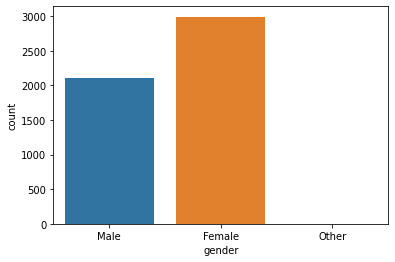

In [8]:
sns.countplot('gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


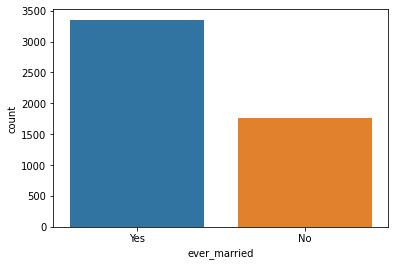

In [9]:
sns.countplot('ever_married',data=df)

<Figure size 1080x864 with 0 Axes>

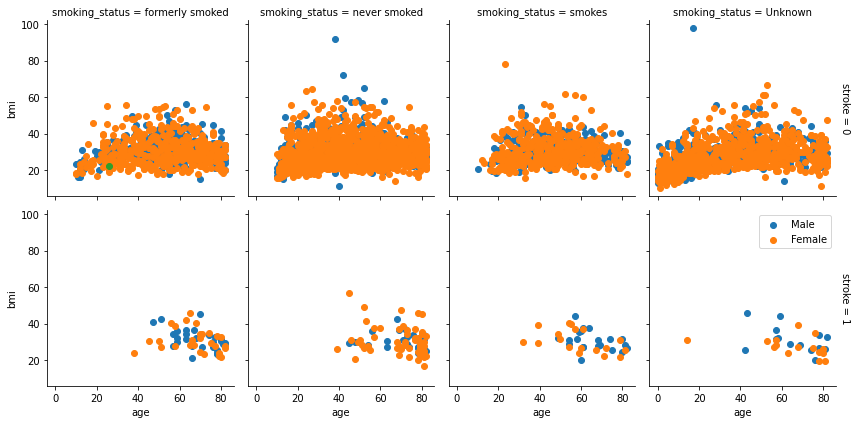

In [10]:
plt.figure(figsize=(15,12))
g=sns.FacetGrid(df,row='stroke',col='smoking_status',hue='gender',margin_titles=True)
g.map(plt.scatter,'age','bmi')
plt.legend(loc='best')
g.tight_layout()


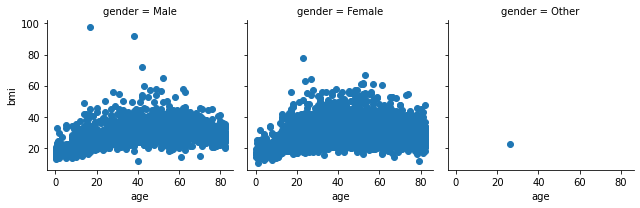

In [11]:
a=sns.FacetGrid(df,col='gender')
a.map(plt.scatter,'age','bmi')

We got the other gender, we will eliminate it as other gender is not possible in the dataset

# Data Cleaning

In [12]:
df.drop(df[df.gender=='Other'].index,inplace=True)

The ColumnTransformer is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms.

For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped.
#By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through

column_tran=ColumnTransformer(transformers=[('cat',OneHotEncoder(),[0,4,5,6,9])])
ohe_array=column_tran.fit_transform(df)

In [15]:
name=[]

for i in column_tran.get_feature_names():
  name.append(i.split('_')[3])

In [16]:
ohe_df=pd.DataFrame(ohe_array,columns=name)
ohe_df.head()

,Female,Male,No,Yes,Govt,Never,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
num_df=df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
num_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


# Data Imputation

we can use the numerical df to perform the missing value imputation

And for Data imputation,we got three approachs and I will explain it one by one as follow:



1.  Simple Imputation:

Replacing the missing values with the mean, median, or mode in a column is a very basic imputation method. This method is the fastest but doesn’t work well on encoded categorical features. In addition, it doesn’t take correlations between features into account eg SimpleImputation()

2.  KNN Imputation

KNNImputer helps to impute missing values present in the observations by finding the k nearest neighbors with the Euclidean distance matrix

3.  MICE Imputation

Multivariate imputation solves the increased noise problem by factoring in other variables in the data. The basic multiple imputation by chained equations (MICE) assumes that the data are missing at random. We can make an educated guess about its true value by looking at other data samples.

reference link: https://www.youtube.com/watch?v=WPiYOS3qK70

In [18]:
# we can use the numerical df to perform the missing value imputation
num_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp_bmi=imp.fit(num_df)
imp_bmi_array=imp_bmi.transform(num_df)

In [20]:
imputed_df=pd.DataFrame(imp_bmi_array,columns=num_df.columns)
imputed_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.600000,1.0
1,61.0,0.0,0.0,202.21,30.975021,1.0
2,80.0,0.0,1.0,105.92,32.500000,1.0
3,49.0,0.0,0.0,171.23,34.400000,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0


In [21]:
imputed_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [22]:
# Below are the imputed records
imputed_df.iloc[df[df.bmi.isnull()].index,:]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,61.0,0.0,0.0,202.21,30.975021,1.0
8,59.0,0.0,0.0,76.15,28.463428,1.0
13,78.0,0.0,1.0,219.84,31.275202,1.0
19,57.0,0.0,1.0,217.08,28.938837,1.0
27,58.0,0.0,0.0,189.84,30.423337,1.0
...,...,...,...,...,...,...
5038,41.0,0.0,0.0,70.15,28.036753,0.0
5047,40.0,0.0,0.0,191.15,30.129679,0.0
5092,45.0,1.0,0.0,95.02,30.855009,0.0
5098,40.0,0.0,0.0,83.94,28.178820,0.0


# Modeling

In [23]:
full_df=pd.concat([ohe_df,imputed_df],axis=1)
full_df.head()

,Female,Male,No,Yes,Govt,Never,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,30.975021,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000,1.0


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

x=full_df.drop('stroke',axis=1)
y=full_df['stroke']

ss_split=StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=0)

for train_index,test_index in ss_split.split(x,y):
  x_train,x_test=x.iloc[train_index],x.iloc[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [25]:
#scale the data

from sklearn.preprocessing import StandardScaler

s_scale=StandardScaler()
x_train=s_scale.fit_transform(x_train)
x_test=s_scale.transform(x_test)

In [26]:
from sklearn.decomposition import PCA

pca=PCA(0.95)
pca_xtrain=pca.fit_transform(x_train)
pca_xtest=pca.transform(x_test)

In [27]:
np.sum(pca.explained_variance_ratio_)

0.9626011512593751

I will use Support Vector Machine and Decision Tree classifier model to predict patient stroke rate 

**Support Vector Machine**

1. **C**

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.


- smaller  C value leads to a wider street but more margin violations.

- high  C  value the
classifier makes fewer margin violations but ends up with a smaller margin


2. **Gamma**

gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

3. **Degree**

degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.


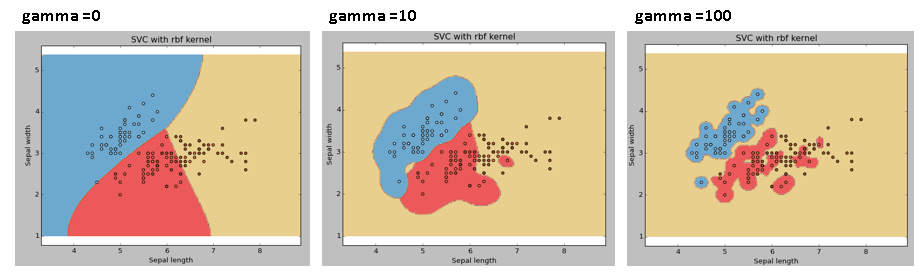

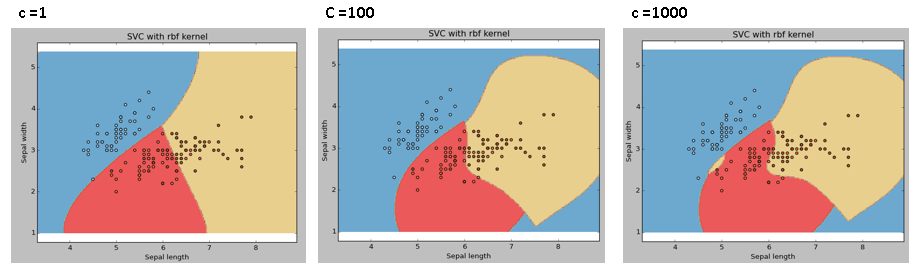

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc=SVC()
para={'C':[0.1,1,5],'kernel':['linear','rbf'],'gamma':[0.1,1,5]}

svc_grid=GridSearchCV(svc,para,scoring='accuracy',cv=5)
svc_grid.fit(pca_xtrain,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5], 'gamma': [0.1, 1, 5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.9513423448060319


In [30]:
from sklearn.metrics import confusion_matrix,classification_report

prediction=svc_grid.predict(pca_xtest)

matrix=confusion_matrix(y_test,prediction)

Text(33.0, 0.5, 'Prediction')

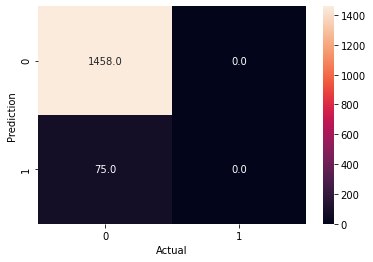

In [31]:
sns.heatmap(matrix,annot=True,fmt='.1f')
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [34]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1458
         1.0       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
svc_grid.score(pca_xtest,y_test)

0.9510763209393346

**Random Forest Classifier**

1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc_model=RandomForestClassifier(n_estimators=5)
rf_parm={'criterion':['gini','entropy'],'max_features':['auto','sqrt'],'max_depth':[int(x) for x in np.linspace(10,30,10)],'min_samples_split':[10,30,50],
         'bootstrap':['True','False']}

rs_cv_RF=RandomizedSearchCV(rfc_model,rf_parm,scoring='accuracy',cv=5)
rs_cv_RF.fit(pca_xtrain,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [53]:
rs_cv_RF.best_estimator_

RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=21, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rs_cv_RF.best_score_

0.9519017853654723

Text(33.0, 0.5, 'Prediction')

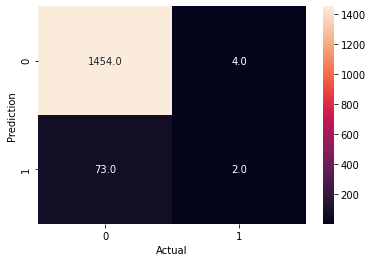

In [56]:
RF_prediction=rs_cv_RF.predict(pca_xtest)

rf_cm=confusion_matrix(y_test,RF_prediction)

sns.heatmap(rf_cm,annot=True,fmt='.1f')
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [58]:
print(classification_report(y_test,RF_prediction))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1458
         1.0       0.33      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533

